In [3]:
import asyncio
import sys

if sys.platform == 'win32':
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

Task 2.1: Summary Statistics & Missing-Value Report

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/raw/togo-dapaong_qc.csv')
# Task 2.1.1: Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
display(summary_stats)
# Task 2.1.2: Missing values
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Columns with >5% missing values:
Comments    100.0
dtype: float64


Task 2.2: Outlier Detection & Cleaning

2.2.1: Missing value, outlier, and inccoret data entries

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


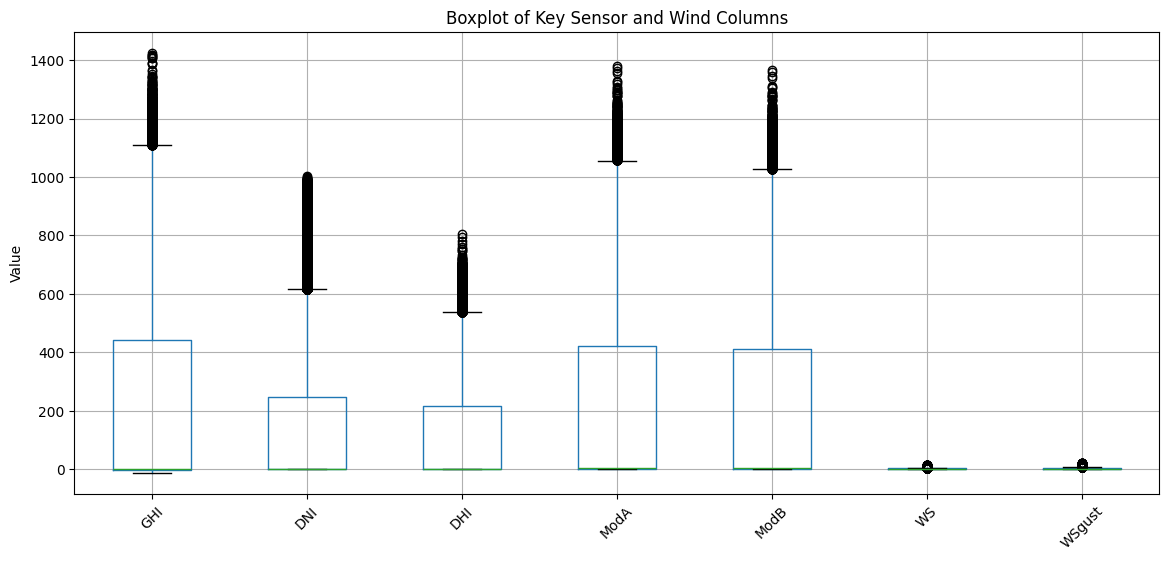

Count of negative (incorrect) entries in each column:
GHI       257385
DNI            0
DHI            0
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [5]:
import matplotlib.pyplot as plt

# check for missing values in key columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_report = df[cols].isna().sum()
print("Missing values in key columns:")
print(missing_report)

# check for outliers in key columns
plt.figure(figsize=(14, 6))
df[cols].boxplot()
plt.title('Boxplot of Key Sensor and Wind Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()
# Check for negative values (not physically possible)
negatives = (df[cols] < 0).sum()
print("Count of negative (incorrect) entries in each column:")
print(negatives)


2.2.2: Compute Z-scores

In [6]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the selected columns
z_scores = df[cols].apply(zscore)

# Flag rows where any column has |Z| > 3
outlier_rows = (z_scores.abs() > 3).any(axis=1)

print(f"Number of rows with at least one outlier (|Z| > 3): {outlier_rows.sum()}")
print("Indices of outlier rows:")
print(df.index[outlier_rows].tolist())

Number of rows with at least one outlier (|Z| > 3): 9251
Indices of outlier rows:
[4985, 5410, 5411, 5413, 5420, 5425, 5429, 5432, 7860, 16808, 16809, 16854, 16855, 16856, 22503, 22507, 22508, 22509, 22561, 22562, 22563, 22566, 22568, 22569, 22570, 22575, 22577, 22597, 22598, 22599, 22600, 22601, 22602, 25434, 25435, 25436, 25437, 25438, 25439, 25440, 25441, 25442, 25443, 25444, 25445, 25470, 25471, 25472, 25473, 25474, 25475, 25476, 25477, 25478, 33923, 39532, 39542, 39543, 39544, 39545, 39546, 39547, 39548, 39549, 39550, 39551, 39552, 39553, 39554, 39558, 39559, 39560, 39561, 39562, 39568, 39570, 39571, 39572, 39573, 39574, 39575, 39579, 39580, 39581, 39583, 39584, 39585, 39586, 39587, 42473, 42474, 42516, 48237, 49568, 49569, 49570, 49571, 49574, 49575, 49576, 49577, 49578, 49579, 49580, 49581, 49582, 49583, 49584, 49585, 49586, 49587, 49588, 49589, 49590, 49591, 49592, 49593, 49594, 49595, 49596, 49597, 49598, 49599, 49600, 49601, 49602, 49603, 49604, 49605, 49606, 49607, 49608, 49

2.2.3. Drop or impute (median) missing values

In [7]:
#Impute missing values with median
df[cols] = df[cols].fillna(df[cols].median())
print("Missing values after imputation (should be 0):")
print(df[cols].isna().sum())

Missing values after imputation (should be 0):
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


2.2.4:  Export the cleaned dataset

In [8]:
# Export the cleaned DataFrame to CSV
df.to_csv('../../data/clean/togo_clean.csv')

Task 2.3: Time Series Analysis

2.3.1: Line charts

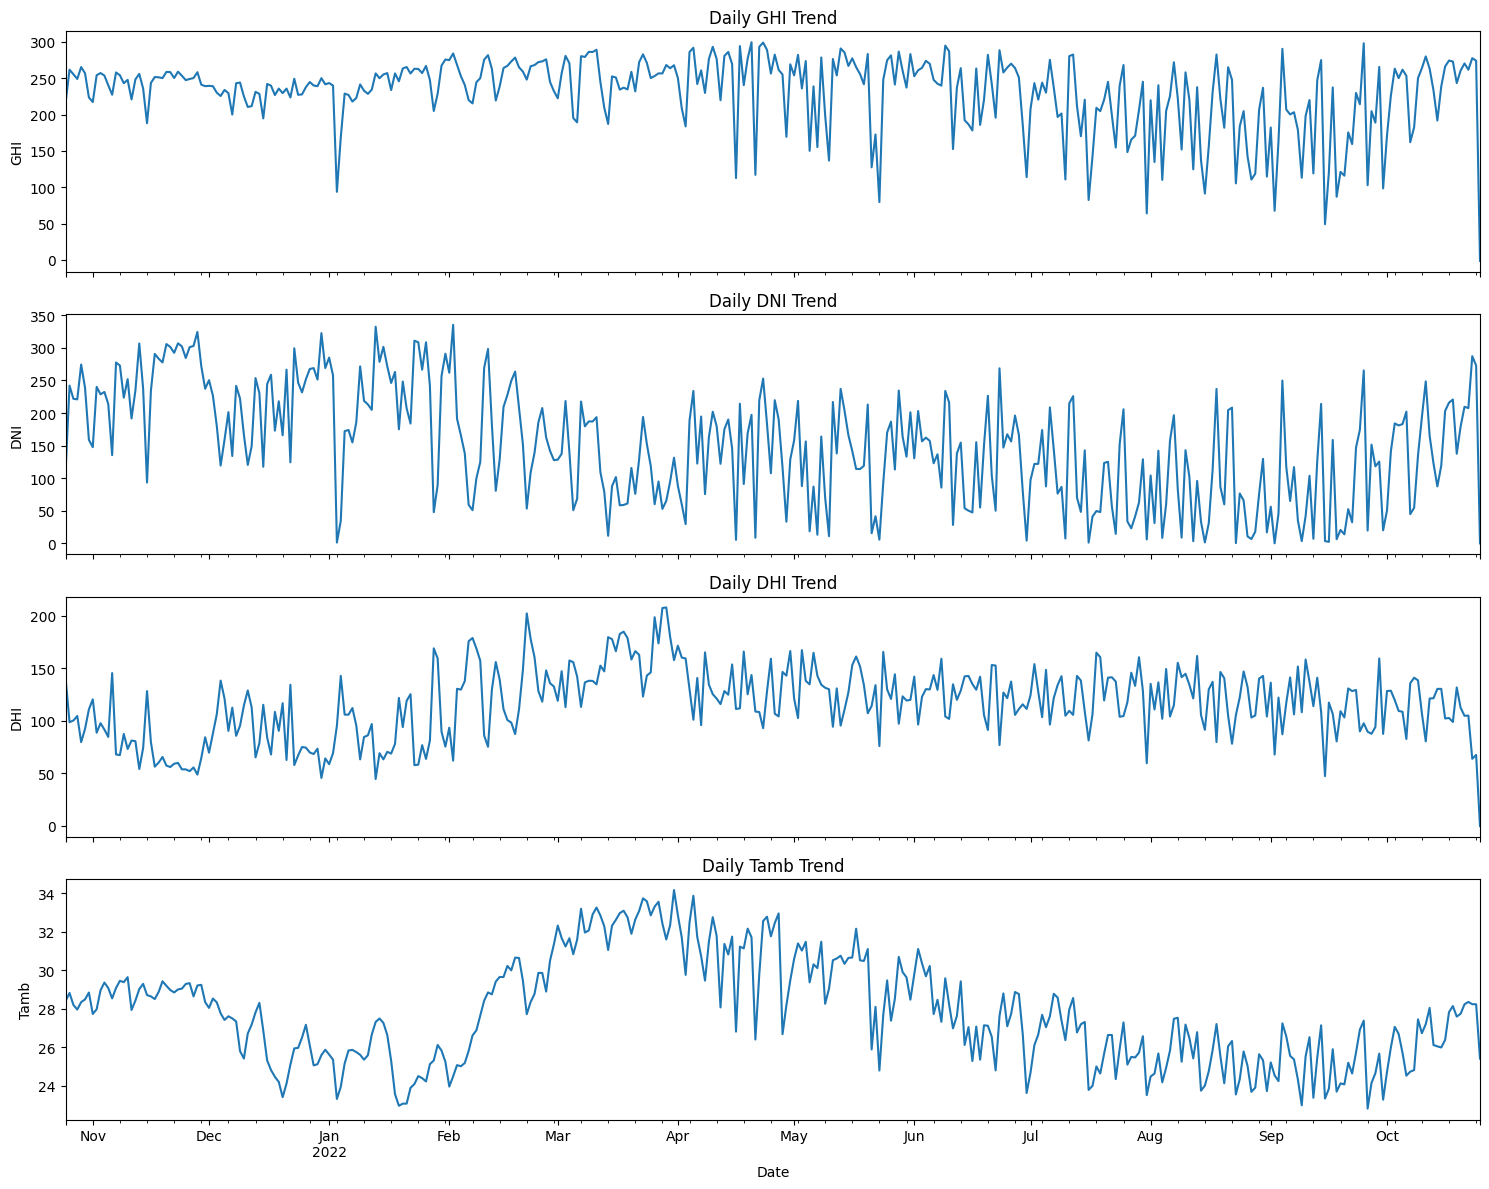

In [9]:
# If 'Timestamp' is already the index, reset it first
if df.index.name == 'Timestamp':
    df.reset_index(inplace=True)

# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot daily trends for GHI, DNI, DHI, Tamb
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
for i, metric in enumerate(metrics):
    df[metric].resample('D').mean().plot(ax=axes[i], title=f'Daily {metric} Trend')
    axes[i].set_ylabel(metric)
plt.xlabel('Date')
plt.tight_layout()
plt.show()

2.3.2: Observe patterns
A. Monthly Patterns

<Figure size 1200x600 with 0 Axes>

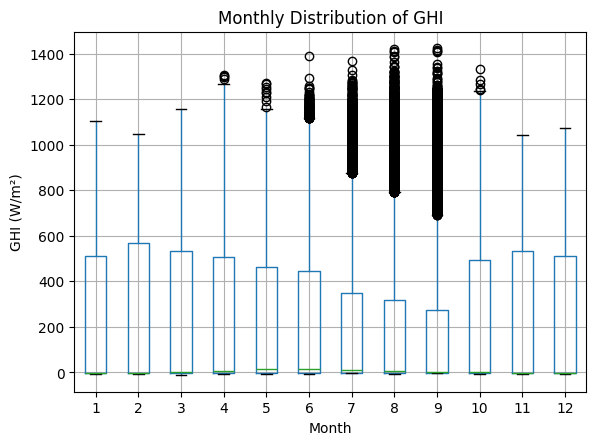

In [10]:
# Add a 'Month' column for grouping
df['Month'] = df.index.month

plt.figure(figsize=(12, 6))
df.boxplot(column='GHI', by='Month')
plt.title('Monthly Distribution of GHI')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.show()

B. Daily Trends

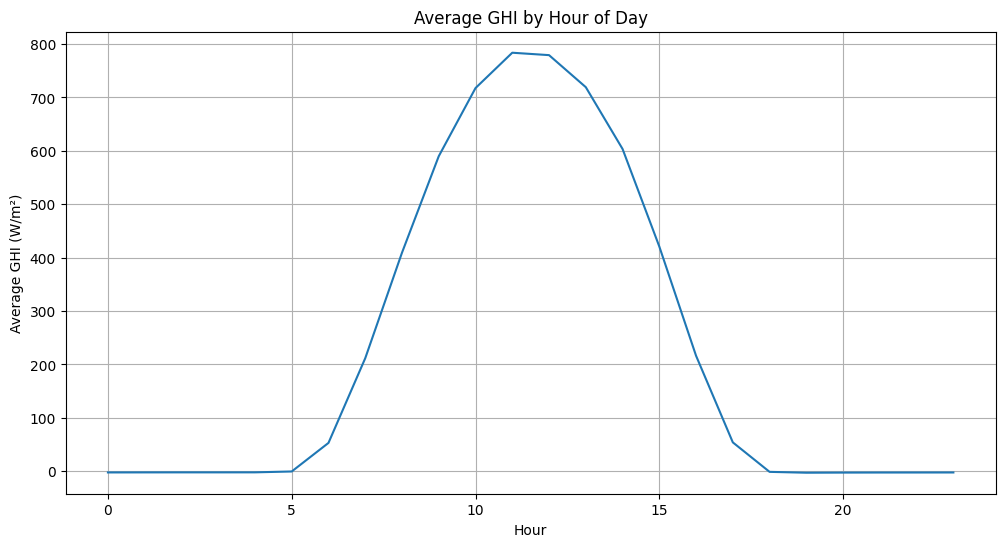

In [11]:
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))
df.groupby('Hour')['GHI'].mean().plot()
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True)
plt.show()

C. Anomalies: Peaks and Fluctuations

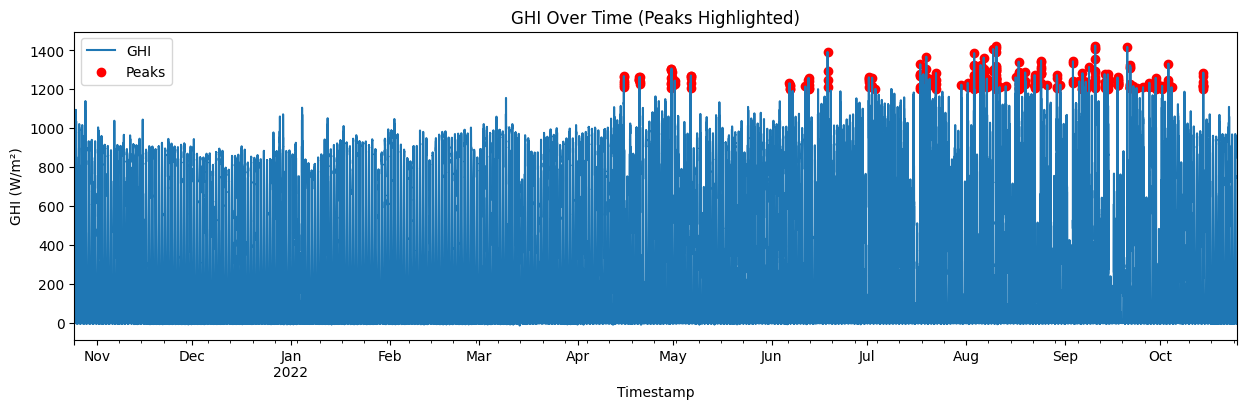

In [12]:
plt.figure(figsize=(15, 4))
df['GHI'].plot()
plt.title('GHI Over Time (Peaks Highlighted)')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
# Highlight peaks above a threshold (e.g., 1200 W/m²)
peaks = df[df['GHI'] > 1200]
plt.scatter(peaks.index, peaks['GHI'], color='red', label='Peaks')
plt.legend()
plt.show()

Task 2.4: Cleaning Impact Analysis

<Figure size 800x400 with 0 Axes>

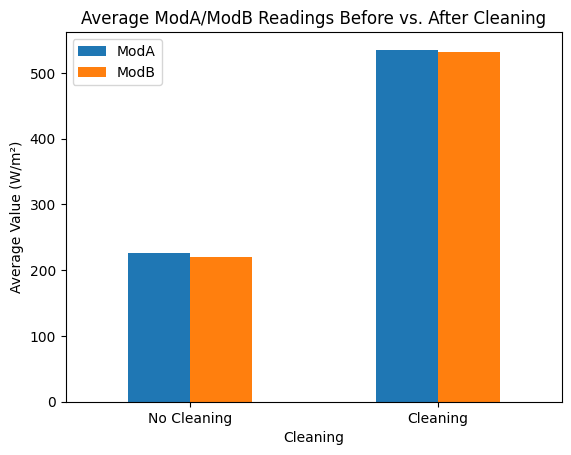

In [13]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 4))
cleaning_impact.set_index('Cleaning').plot(kind='bar', rot=0)
plt.title('Average ModA/ModB Readings Before vs. After Cleaning')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'])
plt.ylabel('Average Value (W/m²)')
plt.show()

Task 2.5: Correlation & Relationships

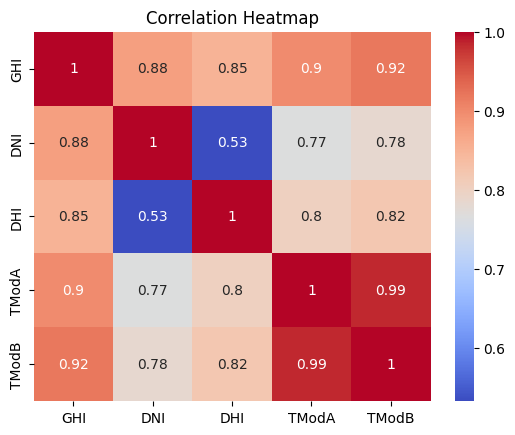

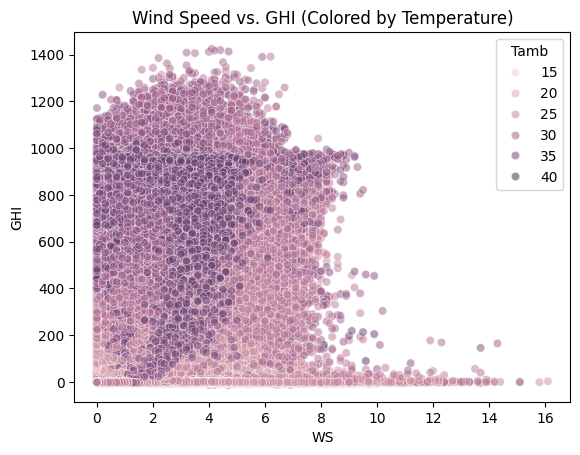

In [14]:
import seaborn as sns

# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', alpha=0.5)
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.show()

Task 2.6: Wind & Distribution Analysis

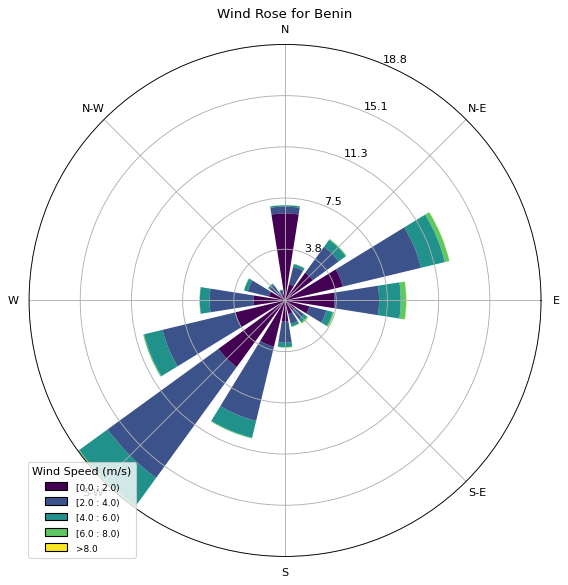

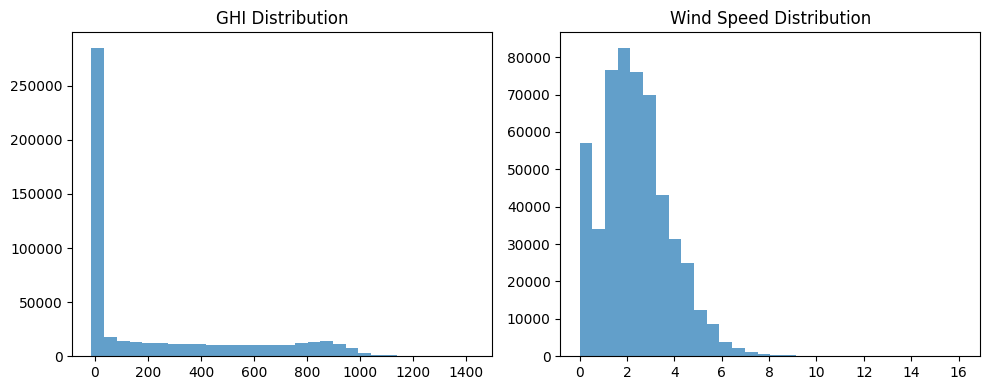

In [15]:
# Wind Rose (Install windrose: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=np.arange(0, 10, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose for Benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, alpha=0.7)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

Task 2.7: Temperature Analysis

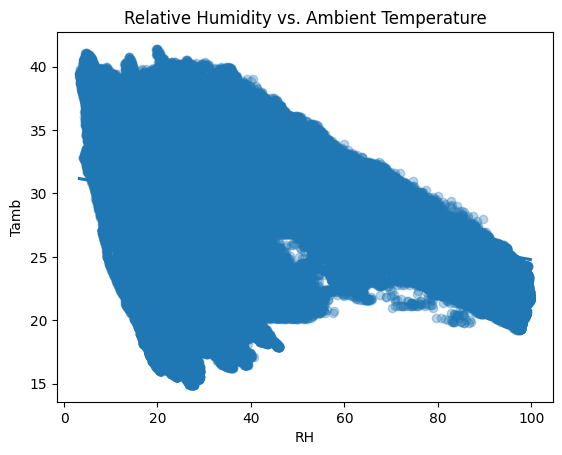

In [16]:
# RH vs. Tamb
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.3})
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

Task 2.8: Bubble Chart

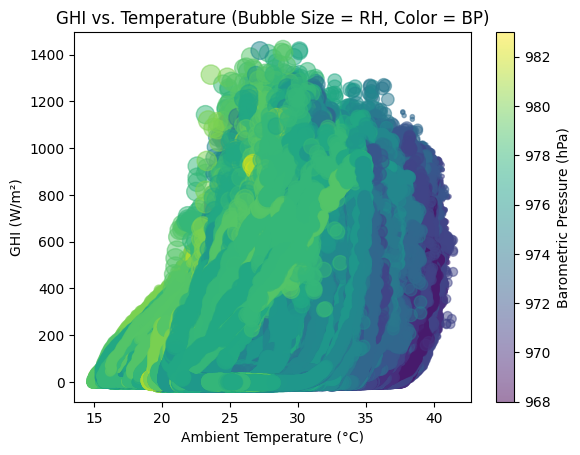

In [17]:
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size = RH
    c=df['BP'],     # Color = BP
    alpha=0.5,
    cmap='viridis'
)
plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()